In [1]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
from sklearn.datasets import make_blobs, make_classification

X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=5, random_state=42)

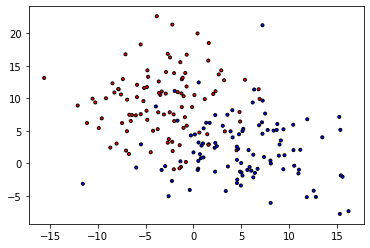

In [3]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'b'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='.', edgecolors='black')
plt.savefig('figures/blob_data.pdf')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
classifiers = [LogisticRegression(),               
               SVC(kernel='rbf'),
               XGBClassifier(n_estimators=10),
               KNeighborsClassifier(n_neighbors=10),               
               GaussianNB(),
               DecisionTreeClassifier(),
               SVC(kernel='poly', degree=5),               
               KNeighborsClassifier(n_neighbors=3),
               MLPClassifier(),
               XGBClassifier(n_estimators=200)
              ]

names = ['Logistic Regression', 'SVM (kernel="rbf")', 'XGBoost (n_estimators=10)', 'KNN (k=10)', 'Gaussian Naive Bayes', 
         'Decision Tree', 'SVM (kernel="poly")', 'KNN (k=3)', 'MLP', 'XGBoost (n_estimators=200)']

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, ax): 
    # Assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    
    h=0.01 # resolution of the mesh grid
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape)  
    
    # Put the result into a color plot    
    plt.sca(ax)
    cmap = ListedColormap(['r', 'b'])
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # Plot the sample points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='.', edgecolors='black')

Logistic Regression 0.875
SVM (kernel="rbf") 0.875
XGBoost (n_estimators=10) 0.85
KNN (k=10) 0.875
Gaussian Naive Bayes 0.875
Decision Tree 0.825
SVM (kernel="poly") 0.8
KNN (k=3) 0.9
MLP 0.85
XGBoost (n_estimators=200) 0.85


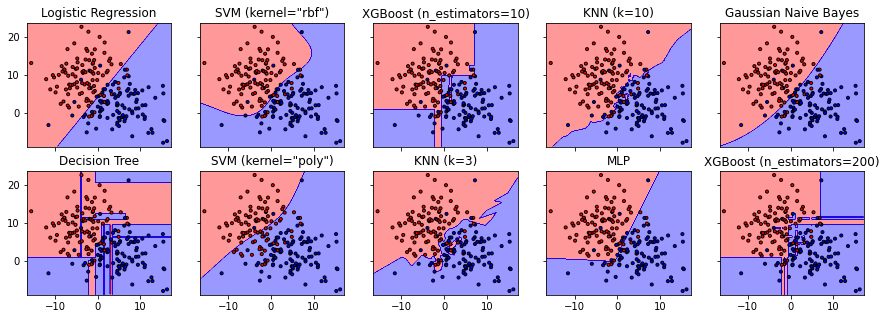

In [7]:
fig, axes = plt.subplots(2, 5, sharex='all', sharey='all', figsize=(15, 5))

for ax, clf, name in zip(axes.flat, classifiers, names):
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print(name, test_score)
    plot_decision_boundaries(clf, X, y, ax)
    plt.title(f'{name}')
    
#plt.savefig('figures/decision_boundaries.pdf')
plt.savefig('figures/solution.pdf')